<div style=" background-color: RGB(0,100,0);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 5 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Optimisez la gestion des données d'une boutique de vins et spiritueux avec R ou Python
</h2>
</div>

<div style="background-color: RGB(0,150,0);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape d'introduction - Importation des librairies et chargement des fichiers</h2>
</div>

In [400]:
#Importation des librairies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [401]:
#Importation des datas

fichier_erp= pd.read_excel("Fichier_erp1.xlsx")
fichier_liaison= pd.read_excel("Fichier_liaison1.xlsx")
fichier_web= pd.read_excel("Fichier_web1.xlsx")

In [402]:
#Rapide vérification des colonnes et lignes de mes 3 fichiers

display(fichier_erp)
display(fichier_liaison)
display(fichier_web)
print("Nombre de colonnes et de lignes correspondent pour mes 3 fichiers excel.")

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Nombre de colonnes et de lignes correspondent pour mes 3 fichiers excel.


# 1- Exploration et nettoyage des données

## 1a - Fichier ERP

In [403]:
#Type de données dans la catégorie "product_id"
fichier_erp["product_id"].dtype

dtype('int64')

In [404]:
#Exploration de la colonne "product_id"
int_erp_id=fichier_erp[~fichier_erp["product_id"].astype(str).str.isdigit()]
print(int_erp_id)
print("Les valeurs de ma colonne product_id sont tous en integer.")

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: []
Les valeurs de ma colonne product_id sont tous en integer.


In [405]:
#Exploration de la colonne "product_id"
doublon_erp=fichier_erp[fichier_erp["product_id"].duplicated()]
print(doublon_erp)
print("Il n'y'a pas de doublon dans la partie ID de mon fichier ERP")

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: []
Il n'y'a pas de doublon dans la partie ID de mon fichier ERP


In [406]:
#Exploration de la colonne "onsale_web"
int_erp_onsale=fichier_erp[~fichier_erp["onsale_web"].astype(str).str.isdigit()]
print(int_erp_onsale)
print("Les valeurs de ma colonne onsale_web sont tous en integer.")

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: []
Les valeurs de ma colonne onsale_web sont tous en integer.


In [407]:
#Type de données dans "price"
fichier_erp["price"].dtype

dtype('float64')

In [408]:
#Exploration de la colonne "price"
prix_negatifs=fichier_erp[fichier_erp["price"]<0]
display(prix_negatifs)
print("Il y'a 2 valeurs négatifs dans price sur le fichier ERP")

,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,0,-8.0,0,outofstock
739,6594,0,-1.0,192,instock


Il y'a 2 valeurs négatifs dans price sur le fichier ERP


In [409]:
fichier_erp_corrige=fichier_erp.copy()

In [410]:
# Remplacez les valeurs négatives dans la colonne "price" par un autre prix
fichier_erp_corrige.loc[fichier_erp_corrige["product_id"] == 5017, "price"] = 8.0
fichier_erp_corrige.loc[fichier_erp_corrige["product_id"] == 6594, "price"] = 1.0

# Affichez les lignes où le prix était négatif après la correction
prix_negatifs_corriges = fichier_erp_corrige[fichier_erp_corrige["price"] < 0]
display(prix_negatifs_corriges)

# Affichez un message indiquant le nombre de valeurs corrigées
print(f"Il y a {len(prix_negatifs_corriges)} valeurs négatives dans la colonne prix, maintenant corrigées à 0.")


,product_id,onsale_web,price,stock_quantity,stock_status


Il y a 0 valeurs négatives dans la colonne prix, maintenant corrigées à 0.


In [411]:
verification_lignes = fichier_erp_corrige[(fichier_erp_corrige["product_id"] == 5017) | (fichier_erp_corrige["product_id"] == 6594)]
display(verification_lignes)


,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,0,8.0,0,outofstock
739,6594,0,1.0,192,instock


In [412]:
display(fichier_erp_corrige)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [413]:
lignes_isolees = fichier_liaison[(fichier_liaison["product_id"] == 5017) | (fichier_liaison["product_id"] == 6594)]
print(lignes_isolees)

     product_id id_web
469        5017    NaN
739        6594    NaN


In [414]:
#Type de données dans la catégorie "stock_quantity"
fichier_erp["stock_quantity"].dtype

dtype('int64')

In [415]:
#Exploration du "stock_quantity"
print("Stock en négatif :")
print()
stock_neg = fichier_erp[(fichier_erp["stock_quantity"]<0) & ((fichier_erp["stock_status"] == "instock") | (fichier_erp["stock_status"] == "outofstock"))]
print(stock_neg)
print()
print("Il y'a deux lignes dans notre fichier ERP qui sont en stock négatif")

Stock en négatif :

     product_id  onsale_web  price  stock_quantity stock_status
449        4973           0   10.0              -1   outofstock
573        5700           1   44.5              -1   outofstock

Il y'a deux lignes dans notre fichier ERP qui sont en stock négatif


In [416]:
# Remplacez les valeurs négatives dans la colonne "stock_quantity" par 0
fichier_erp_corrige.loc[fichier_erp_corrige["stock_quantity"] < 0, "stock_quantity"] = 0

# Affichez les lignes où le stock_quantity était négatif après la correction
stock_negatifs_corriges = fichier_erp_corrige[fichier_erp_corrige["stock_quantity"] < 0]
display(stock_negatifs_corriges)

# Affichez un message indiquant le nombre de valeurs corrigées
print(f"Il y a {len(stock_negatifs_corriges)} valeurs négatives dans la colonne stock_quantity, maintenant corrigées à 0.")

,product_id,onsale_web,price,stock_quantity,stock_status


Il y a 0 valeurs négatives dans la colonne stock_quantity, maintenant corrigées à 0.


In [417]:
#Type de données dans la catégorie "stock_status"
fichier_erp["stock_status"].dtype

dtype('O')

In [418]:
#Exploration des "stock_status"
valeurs_possibles = ['outofstock', 'instock']
valeurs_non_conformes = fichier_erp[~fichier_erp['stock_status'].isin(valeurs_possibles)]
print("Lignes avec des valeurs dans stock_status différentes de 'outofstock' et 'instock' : 0")

Lignes avec des valeurs dans stock_status différentes de 'outofstock' et 'instock' : 0


In [419]:
#Exploration du "stock_quantity" par rapport au "stock_status"
print("Stock à 0 :")
print()
stock_0=fichier_erp[(fichier_erp["stock_quantity"]==0) & (fichier_erp["stock_status"]=="instock")]
print(stock_0)
print()
print("Stock supérieure à 0 :")
print()
stock_pos=fichier_erp[(fichier_erp["stock_quantity"]>0) & (fichier_erp["stock_status"]=="outofstock")]
print(stock_pos)
print()
print("Il y'a une valeur à 0 en stock quantity qui retourne un status instock, de plus il y'a 5 valeurs en stock positifs qui retourne un status outofstock")

Stock à 0 :

     product_id  onsale_web  price  stock_quantity stock_status
443        4954           1   25.0               0      instock

Stock supérieure à 0 :

     product_id  onsale_web  price  stock_quantity stock_status
19         4055           0   86.1               1   outofstock
49         4090           0   73.0               6   outofstock
50         4092           0   47.0               6   outofstock
630        5826           1   41.2              12   outofstock
696        6125           0   14.2              48   outofstock

Il y'a une valeur à 0 en stock quantity qui retourne un status instock, de plus il y'a 5 valeurs en stock positifs qui retourne un status outofstock


In [420]:
#Vérification du nombre de valeurs manquantes dans le fichier erp
print(fichier_erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


## 1b - Fichier Liaison

In [421]:
#Exploration des doublons dans ma colonne "product_id"
doublon_liaison=fichier_liaison[fichier_liaison["product_id"].duplicated()]
print(doublon_liaison)
print("Il n'y'a pas de doublon dans ma colonne product_id de mon fichier liaison")

Empty DataFrame
Columns: [product_id, id_web]
Index: []
Il n'y'a pas de doublon dans ma colonne product_id de mon fichier liaison


In [422]:
#Exploration de la colonne "product_id"
int_liaison_id=fichier_liaison[~fichier_liaison["product_id"].astype(str).str.isdigit()]
print(int_liaison_id)
print("Les valeurs de ma colonne product_id sont tous en integer.")

Empty DataFrame
Columns: [product_id, id_web]
Index: []
Les valeurs de ma colonne product_id sont tous en integer.


In [423]:
tri_liaison=fichier_liaison["product_id"] = fichier_liaison["product_id"].astype(str).sort_values()
print(tri_liaison)

0      3847
1      3849
2      3850
3      4032
4      4039
       ... 
820    7203
821    7204
822    7247
823    7329
824    7338
Name: product_id, Length: 825, dtype: object


In [424]:
#Exploration des doublons dans ma colonne "id_web"
doublon_liaison=fichier_liaison[fichier_liaison["id_web"].duplicated()]
print(doublon_liaison)
print("Plusieurs doublons dans fichier id_web sont des valeurs manquantes")

    product_id id_web
49        4090    NaN
50        4092    NaN
119       4195    NaN
131       4209    NaN
151       4233    NaN
..         ...    ...
817       7196    NaN
818       7200    NaN
819       7201    NaN
820       7203    NaN
821       7204    NaN

[90 rows x 2 columns]
Plusieurs doublons dans fichier id_web sont des valeurs manquantes


In [425]:
#Exploration de la colonne "id_web"
int_liaison_web=fichier_liaison[~fichier_liaison["id_web"].astype(str).str.isdigit()]
print(int_liaison_web)
print("Certaines valeurs de ma colonne id_web sont manquantes et deux valeurs ne sont pas en integer.")

    product_id   id_web
19        4055      NaN
49        4090      NaN
50        4092      NaN
119       4195      NaN
131       4209      NaN
..         ...      ...
819       7201      NaN
820       7203      NaN
821       7204      NaN
822       7247  13127-1
823       7329  14680-1

[94 rows x 2 columns]
Certaines valeurs de ma colonne id_web sont manquantes et deux valeurs ne sont pas en integer.


In [426]:
#Changement du non "id_web" par "sku"
fichier_liaison.rename(columns={'id_web': 'sku'}, inplace=True)
display(fichier_liaison)

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [427]:
print(fichier_liaison.isnull().sum())
print("Il y'a 91 lignes sku non renseignées dans le fichier liaison")

product_id     0
sku           91
dtype: int64
Il y'a 91 lignes sku non renseignées dans le fichier liaison


Décision : Je travaillerai sans les valeurs manquantes "NaN" en les supprimants lors de ma jointure entre mes tables. 
Je vais conserver les deux valeurs qui ne sont pas en "integer". (Une de ces valeurs n'est pas reliée aux ventes en ligne)

In [428]:
fichier_liaison_corrige=fichier_liaison.copy()
print(fichier_liaison_corrige)

    product_id      sku
0         3847    15298
1         3849    15296
2         3850    15300
3         4032    19814
4         4039    19815
..         ...      ...
820       7203      NaN
821       7204      NaN
822       7247  13127-1
823       7329  14680-1
824       7338    16230

[825 rows x 2 columns]


In [429]:
fichier_liaison_corrige = fichier_liaison_corrige.dropna(subset=["sku"])
print(fichier_liaison_corrige)

    product_id      sku
0         3847    15298
1         3849    15296
2         3850    15300
3         4032    19814
4         4039    19815
..         ...      ...
792       7023    15891
793       7025    15887
822       7247  13127-1
823       7329  14680-1
824       7338    16230

[734 rows x 2 columns]


In [430]:
nouveaux_sku = {"13127-1": 30000, "14680-1": 30001,"bon-cadeau-25-euros":30002}

# Remplacer les valeurs spécifiques dans la colonne "sku"
fichier_liaison_corrige["sku"] = fichier_liaison_corrige["sku"].replace(nouveaux_sku)
print(fichier_liaison_corrige)

    product_id    sku
0         3847  15298
1         3849  15296
2         3850  15300
3         4032  19814
4         4039  19815
..         ...    ...
792       7023  15891
793       7025  15887
822       7247  30000
823       7329  30001
824       7338  16230

[734 rows x 2 columns]


In [431]:
fichier_liaison_corrige["sku"].dtype

dtype('int64')

In [432]:
display(fichier_liaison_corrige)

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,30000
823,7329,30001


## 1c - Fichier Web

In [433]:
#consultation des intitulés des 28 colonnes de mon fichier web
print(fichier_web.columns)

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')


In [434]:
#Exploration des doublons "sku"
fichier_web[fichier_web["sku"].duplicated()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
13,16209,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
17,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,16274,0,0,0,0.0,13.0,NaN,NaN,2.0,2018-05-03 13:09:18,...,mourgues-du-gres-costieres-de-nimes-capitelles...,2020-08-04 18:55:02,2020-08-04 16:55:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
80,12857,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-12 17:56:13,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
82,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [435]:
#Regardons ce qui peut causer les doublons de plus près via un exemple
fichier_web[fichier_web["sku"]==16209]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
13,16209,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Les lignes en doublons sont causées par le post_type. 
Pour chaque individu je choisis de conserver uniquement la ligne "product".
Attachment renvoie aux détails concernant un produit.

In [436]:
#Vérification des "sku" manquants
int_web_id = fichier_web[~fichier_web["sku"].astype(str).str.isdigit()]
display(int_web_id["sku"])

1       NaN
17      NaN
82      NaN
97      NaN
121     NaN
       ... 
1378    NaN
1421    NaN
1448    NaN
1450    NaN
1496    NaN
Name: sku, Length: 89, dtype: object

In [437]:
#Suppression des lignes pour lesquels nous n'avons pas de sku - pas de rapprochement possible
fichier_web = fichier_web.dropna(subset=["sku"])
display(fichier_web)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [438]:
descriptif_web=fichier_web["post_excerpt"]
display(descriptif_web)
print("Probleme d'encodage de la description")

0                                                     NaN
2       Des couleurs et aromes intenses où le fruit et...
3       Un joli nez aux arômes de fruits rouges, de ca...
4                                                     NaN
5       <span style="display: inline !important; float...
                              ...                        
1508                                                  NaN
1509    Le Brouilly est le plus méridional des crus du...
1510    C’est dans cette cuvée la pleine expression du...
1511                                                  NaN
1512                                                  NaN
Name: post_excerpt, Length: 1428, dtype: object

Probleme d'encodage de la description


In [439]:
#Filtrage de nos données web sur la valeur "product" uniquement
fichier_web=fichier_web[fichier_web["post_type"]=="product"]
display(fichier_web)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,15941,0,0,0,0.0,4.0,taxable,NaN,2.0,2018-02-12 14:26:52,...,jerome-cotes-du-rhone-2018,2020-06-25 14:00:03,2020-06-25 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1503,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,...,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1507,16320,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 12:49:29,...,mourgues-du-gres-costieres-de-nimes-terre-darg...,2020-08-25 11:15:03,2020-08-25 09:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [440]:
int_web_id = fichier_web[~fichier_web["sku"].astype(str).str.isdigit()]
display(int_web_id["sku"])

print("Deux valeurs sku ne sont pas dans le format integer - bon-cadeau et le lot 13127-1")

196    bon-cadeau-25-euros
503                13127-1
Name: sku, dtype: object

Deux valeurs sku ne sont pas dans le format integer - bon-cadeau et le lot 13127-1


In [441]:
nouveaux_sku = {"13127-1": 30000,"bon-cadeau-25-euros":30002}
# Remplacer les valeurs spécifiques dans la colonne "sku"
fichier_web["sku"] = fichier_web["sku"].replace(nouveaux_sku)
display(fichier_web)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,15941,0,0,0,0.0,4.0,taxable,NaN,2.0,2018-02-12 14:26:52,...,jerome-cotes-du-rhone-2018,2020-06-25 14:00:03,2020-06-25 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1503,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,...,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1507,16320,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 12:49:29,...,mourgues-du-gres-costieres-de-nimes-terre-darg...,2020-08-25 11:15:03,2020-08-25 09:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [442]:
display(fichier_web.loc[[196, 503]])

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
196,30002,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
503,30000,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [443]:
fichier_web["sku"].dtype

dtype('int64')

In [444]:
798+716

1514

Sur les 1513 lignes de mon fichier web, 798 sont des doublons.
716 lignes sont catégorisées en post_type "product". 
2 lignes n'ont pas de SKU donc pas d'id à rattacher, nous les supprimons.

Le travail sera donc fait sur 714 lignes

In [445]:
#Consultation du nombre de valeurs manquantes dans mon fichier web après supression des NaN
print(fichier_web.isnull().sum())

sku                        0
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                714
post_author                0
post_date                  0
post_date_gmt              0
post_content             714
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            714
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    714
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           714
comment_count              0
dtype: int64


In [446]:
#Affichage de mon dataframe fichier web après un nettoyage des "sku"
fichier_web.shape

(714, 28)

# 2 - Focus sur le prix depuis le Fichier ERP

## 2a - Exploration des tendances et valeurs présentes dans ma catégorie "price" 

In [447]:
#Type de données dans la catégorie "price"
fichier_erp["price"].dtype

dtype('float64')

In [448]:
# Affichez les indicateurs de tendance centrale
moyenne_price = fichier_erp["price"].mean()
mediane_price = fichier_erp["price"].median()
mode_price = fichier_erp["price"].mode()[0]
skewness = fichier_erp["price"].skew()
kurtosis = fichier_erp["price"].kurtosis()
print("Indicateurs tendance centrale pour la colonne prix :")
print(f"Moyenne : {moyenne_price}")
print(f"Médiane : {mediane_price}")
print(f"Mode : {mode_price}")
print(f"Skewness : {skewness}")
print(f"Kurtosis : {kurtosis}")


Indicateurs tendance centrale pour la colonne prix :
Moyenne : 32.384
Médiane : 24.4
Mode : 45.0
Skewness : 2.610884997777996
Kurtosis : 10.561586629796807


Skewness positive (+2) donc valeurs aberrantes vers la droite (queue plus longue vers la droite par rapport à la distribution normale).

Kurtosis positive (+10) donc distribution plus pointue, valeurs plus concentrées autour de la moyenne, et il y'aura un ou des pics plus prononcés dans la distribution.

In [449]:
prix_min=fichier_erp["price"].min()
prix_max=fichier_erp["price"].max()
print(prix_min)
print(prix_max)

-8.0
225.0


In [450]:
prix_negatifs=fichier_erp[fichier_erp["price"]<0]
display(prix_negatifs)

,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,0,-8.0,0,outofstock
739,6594,0,-1.0,192,instock


Il y'a 2 prix négatifs dans notre dataframe erp

## 2b - Méthode de calcul pour détecter nos valeurs abérrantes dans la catégorie "price" 

In [451]:
#Utilisation du Zscore sur le prix pour trouver des outliers avec un seuil de 3
def detect_outliers1(fichier_erp):
    erp_outliers1 = []
    seuil = 3
    moyenne = np.mean(fichier_erp["price"])
    ecart_type = np.std(fichier_erp["price"])

    for v in fichier_erp["price"]:
        z_score = (v - moyenne) / ecart_type
        if np.abs(z_score) > seuil:
            erp_outliers1.append(v)

    return erp_outliers1

# Application de la fonction sur la colonne "price"
resultat_outliers1 = detect_outliers1(fichier_erp)
print(resultat_outliers1)
print("18 valeurs ont un ecart-type de + ou - 3 par rapport à notre moyenne.")

[225.0, 126.5, 176.0, 157.0, 144.0, 137.0, 217.5, 124.8, 175.0, 191.3, 122.0, 114.0, 135.0, 116.4, 115.0, 121.0, 115.0, 121.0]
18 valeurs ont un ecart-type de + ou - 3 par rapport à notre moyenne.


In [452]:
#Calcul de l'IQR pour detecter les valeurs aberrantes
def detect_outliers1(fichier_erp):
    erp_outliers1 = []
    mediane =  np.median(fichier_erp["price"])
    moyenne = np.mean(fichier_erp["price"])
    ecart_type = np.std(fichier_erp["price"])
    valeurs_hors_boxplot = 0
    q1 = np.percentile(fichier_erp["price"], 25)
    q3 = np.percentile(fichier_erp["price"], 75)
    iqr = q3 - q1
    lower_limit_boxplot = q1 - 1.5 * iqr
    upper_limit_boxplot = q3 + 1.5 * iqr

    for v in fichier_erp["price"]:
        if  v < lower_limit_boxplot or v > upper_limit_boxplot:
            erp_outliers1.append(v)
            valeurs_hors_boxplot += 1

    print(f"Nombre de points au-dessus du boxplot : {valeurs_hors_boxplot}")
    print(f"Q1 (25th percentile) : {q1}")
    print(f"Q3 (75th percentile) : {q3}")
    print(f"IQR (Ecart Interquartile) : {iqr}")
    print(f"Médiane : {mediane}")
    print(f"Limite inférieure du boxplot : {lower_limit_boxplot}")
    print(f"Limite supérieure du boxplot : {upper_limit_boxplot}")
    print(f"Min : {np.min(fichier_erp['price'])}")
    print(f"Max : {np.max(fichier_erp['price'])}")

    return erp_outliers1

# Application de la fonction sur la colonne "price"
resultat_outliers1 = detect_outliers1(fichier_erp)
print(resultat_outliers1)


Nombre de points au-dessus du boxplot : 37
Q1 (25th percentile) : 14.6
Q3 (75th percentile) : 42.0
IQR (Ecart Interquartile) : 27.4
Médiane : 24.4
Limite inférieure du boxplot : -26.499999999999993
Limite supérieure du boxplot : 83.1
Min : -8.0
Max : 225.0
[86.1, 100.0, 88.4, 225.0, 126.5, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 144.0, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 84.7, 92.0, 83.7, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0, 92.0]


In [453]:
#Trie et filtre pour montrer les 5 vins les plus chers de notre fichier.
erp_outliers1_trie=fichier_erp.sort_values(by="price",ascending=False)
display(erp_outliers1_trie.head(5))

,product_id,onsale_web,price,stock_quantity,stock_status
208,4352,1,225.0,0,outofstock
460,5001,1,217.5,20,instock
635,5892,1,191.3,10,instock
227,4402,1,176.0,8,instock
598,5767,1,175.0,12,instock


Ci-dessus, les 5 produits aux prix le plus élevés de notre boutique de vins et spiritueux. Les prix de ces produits sont considérés abérrants au vu de la moyenne de l'ensemble des prix de nos produits de notre catalogue.

A noter, le vin le plus cher est actuellement à 0 et outofstock. 
Se vend t il très bien ou avons nous arreter d'en commander car pas assez de vente ? 

A noter, les 5 vins se vendent aussi sur notre boutique web.

## 2c - Représentation graphique de nos valeurs abérrantes 

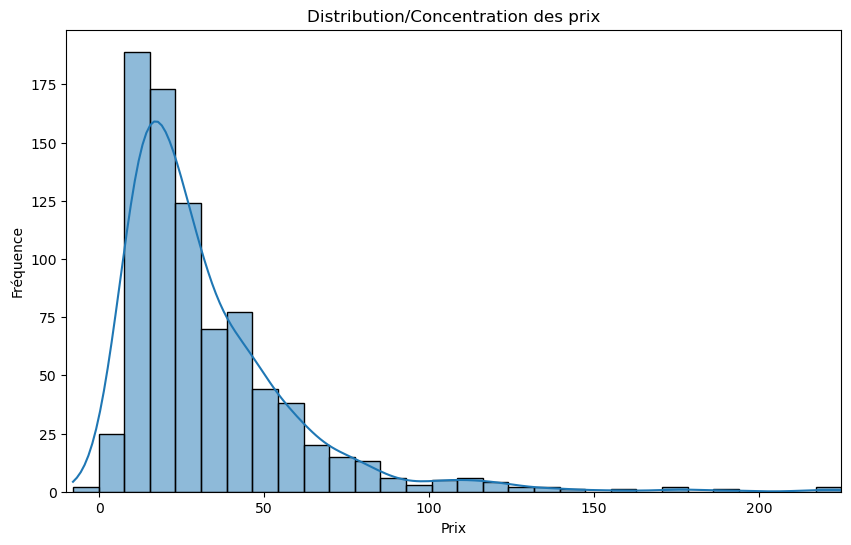

In [454]:
plt.figure(figsize=(10, 6))
sns.histplot(fichier_erp["price"], bins=30, kde=True)
plt.xlim(-10,225)
plt.title("Distribution/Concentration des prix")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

Plus la courbe est haute, plus il y a de prix autour de cette valeur.

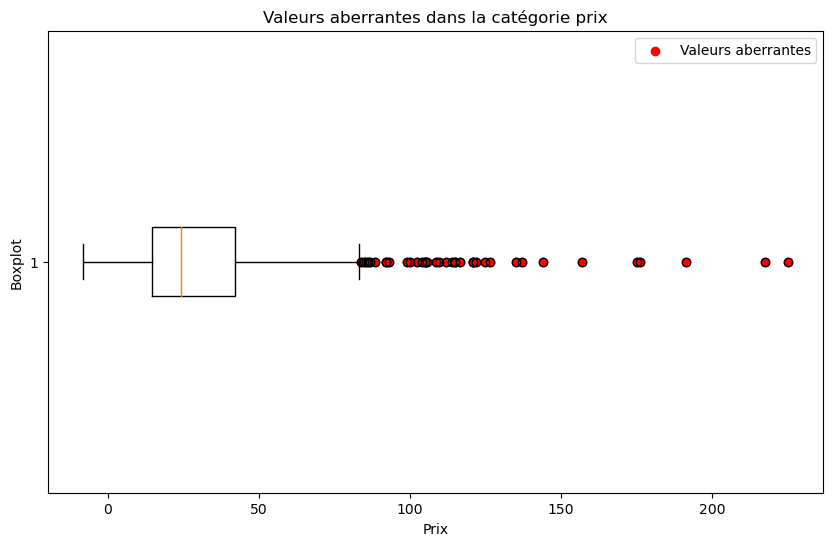

In [455]:
plt.figure(figsize=(10,6))
plt.boxplot(fichier_erp["price"], vert=False)
plt.scatter(resultat_outliers1, np.ones(len(resultat_outliers1)), color="red", label="Valeurs aberrantes")
plt.xlabel("Prix")
plt.ylabel("Boxplot")
plt.title("Valeurs aberrantes dans la catégorie prix")
plt.legend()

Les moustaches s'étirent de part et d'autre de ma boite, ils s'étirent à une distance maximale de 1,5x l'IQR soit 1,5x 27,4= 41,1

# 3 - Calcul du chiffre d'affaire total en ligne et par produits vendus en ligne

## 3a - Jointure de mes fichiers erp/liaison/web

Précision ci dessous : Ma colonne "product_id" et ma colonne "sku" n'étant pas aux mêmes format de données (object) j'ai changé l'une des deux colonnes pour avoir le meme format et pouvoir faire la jointure

In [456]:
#Jointure de mes fichiers ERP/Liaison/Web
fichier_erp_corrige["product_id"] = fichier_erp_corrige["product_id"].astype(str)

# Effectuer la fusion après la conversion
web_liaison = pd.merge(fichier_web, fichier_liaison_corrige, left_on="sku", right_on="sku", how="inner")
erp_web = pd.merge(web_liaison, fichier_erp_corrige, on="product_id", how="inner")
display(erp_web)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4165,1,12.0,57,instock
1,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4174,1,5.7,94,instock
2,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5796,1,12.5,12,instock
3,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4582,1,109.6,7,instock
4,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6106,1,74.8,15,instock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,15941,0,0,0,0.0,4.0,taxable,NaN,2.0,2018-02-12 14:26:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4074,1,12.7,50,instock
710,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4617,1,67.5,1,instock
711,16320,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 12:49:29,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4062,1,11.9,60,instock
712,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4262,1,15.8,35,instock


## 3b - Filtrage et nettoyage des données avant calcul 

In [457]:
#Filtrage sur les produits uniquement disponible en ligne (onsale web)
produit_vendus_online=erp_web[erp_web["onsale_web"]>0]
display(produit_vendus_online)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4165,1,12.0,57,instock
1,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4174,1,5.7,94,instock
2,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5796,1,12.5,12,instock
3,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4582,1,109.6,7,instock
4,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6106,1,74.8,15,instock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,15941,0,0,0,0.0,4.0,taxable,NaN,2.0,2018-02-12 14:26:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4074,1,12.7,50,instock
710,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4617,1,67.5,1,instock
711,16320,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 12:49:29,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4062,1,11.9,60,instock
712,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4262,1,15.8,35,instock


In [458]:
#Vérification de doublon "sku"
produit_vendus_online["sku"].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
709    False
710    False
711    False
712    False
713    False
Name: sku, Length: 714, dtype: bool

In [459]:
#Vérification de valeurs manquantes "NaN"
produit_vendus_online.loc[produit_vendus_online["sku"].isna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status


In [460]:
#Suppresion des valeurs "NaN"
total_produit_online=produit_vendus_online.dropna(subset=['sku'])
display(total_produit_online)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4165,1,12.0,57,instock
1,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4174,1,5.7,94,instock
2,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,5796,1,12.5,12,instock
3,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4582,1,109.6,7,instock
4,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6106,1,74.8,15,instock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,15941,0,0,0,0.0,4.0,taxable,NaN,2.0,2018-02-12 14:26:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4074,1,12.7,50,instock
710,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4617,1,67.5,1,instock
711,16320,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 12:49:29,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4062,1,11.9,60,instock
712,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4262,1,15.8,35,instock


## 3c - Calcul du CA par produit et du CA total en ligne 

In [461]:
#Création d'une colonne "ca_par produit" dans ma dataframe
erp_web["ca_par_produit"] = total_produit_online["total_sales"] * total_produit_online["price"]
display(erp_web)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,ca_par_produit
0,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,0.0,product,NaN,0.0,4165,1,12.0,57,instock,36.0
1,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,0.0,product,NaN,0.0,4174,1,5.7,94,instock,34.2
2,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,0.0,product,NaN,0.0,5796,1,12.5,12,instock,0.0
3,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,0.0,product,NaN,0.0,4582,1,109.6,7,instock,0.0
4,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,0.0,product,NaN,0.0,6106,1,74.8,15,instock,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,15941,0,0,0,0.0,4.0,taxable,NaN,2.0,2018-02-12 14:26:52,...,0.0,product,NaN,0.0,4074,1,12.7,50,instock,50.8
710,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,...,0.0,product,NaN,0.0,4617,1,67.5,1,instock,0.0
711,16320,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-12 12:49:29,...,0.0,product,NaN,0.0,4062,1,11.9,60,instock,35.7
712,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,0.0,product,NaN,0.0,4262,1,15.8,35,instock,47.4


In [462]:
#Calcul du CA total web
CA_totale_web=round(erp_web["ca_par_produit"].sum(),2)
print(f"Nous avons réalisé un chiffre d'affaire web de {CA_totale_web} €")

Nous avons réalisé un chiffre d'affaire web de 70568.6 €


In [463]:
details_par_produit = erp_web.groupby('sku').agg({"ca_par_produit": "sum","total_sales": "sum"}).reset_index()
display(details_par_produit)

,sku,ca_par_produit,total_sales
0,38,326.8,38.0
1,41,0.0,0.0
2,304,1560.0,40.0
3,523,0.0,0.0
4,531,292.5,13.0
...,...,...,...
709,19820,0.0,0.0
710,19821,0.0,0.0
711,19822,0.0,0.0
712,30000,0.0,0.0


In [464]:
#Enregistrement du tableau CA par produit en version excel
chemin_fichier_excel = "C:\\Users\\Edine\\Documents\\OPC\\P5\\EXERCICES\\details_par_produit.xlsx"
details_par_produit.to_excel(chemin_fichier_excel, index=False)

print(f"Les données ont été enregistrées avec succès dans {chemin_fichier_excel}")

Les données ont été enregistrées avec succès dans C:\Users\Edine\Documents\OPC\P5\EXERCICES\details_par_produit.xlsx


In [465]:
#Consultation des produits ayant générés le plus de chiffre après un tri
CA_tableau_tri=erp_web.sort_values(by="ca_par_produit",ascending=False)
display(CA_tableau_tri.head())

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,ca_par_produit
365,7818,0,0,0,0.0,96.0,taxable,NaN,2.0,2018-03-01 14:02:44,...,0.0,product,NaN,0.0,4334,1,49.0,0,outofstock,4704.0
666,1662,0,0,0,0.0,87.0,taxable,NaN,2.0,2018-02-13 13:17:25,...,0.0,product,NaN,0.0,4144,1,49.0,11,instock,4263.0
186,3510,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,...,0.0,product,NaN,0.0,4402,1,176.0,8,instock,2288.0
533,11641,0,0,0,0.0,30.0,taxable,NaN,2.0,2018-02-13 13:08:44,...,0.0,product,NaN,0.0,4142,1,53.0,8,instock,1590.0
367,304,0,0,0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,0.0,product,NaN,0.0,4141,1,39.0,1,instock,1560.0


In [466]:
#Note sur les 2 anomalies dans la colonne "sku"
erp_web[~erp_web["sku"].astype(str).str.isdigit()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,ca_par_produit


<div style="border: 1px solid RGB(0,0,0);" >
<h3 style="margin: auto; padding: 25px; color: RGB(0,0,0); ">- Divers analyses : Recherche de données abérrantes/outliers sur d'autres colonnes - </h3>
</div>

    ## Ci dessous, je suis sur mon fichier erp_web (donc le fichier fusionné et filtré) ##

# Outliers 2 - Catégorie "Total_sales"

In [467]:
# Affichez les indicateurs de tendance centrale
moyenne_price = erp_web["total_sales"].mean()
mediane_price = erp_web["total_sales"].median()
mode_price = erp_web["total_sales"].mode()[0]  
skewness = erp_web["total_sales"].skew()
kurtosis = erp_web["total_sales"].kurtosis()
print("Indicateurs tendance centrale pour la colonne total_sales :")
print(f"Moyenne : {moyenne_price}")
print(f"Médiane : {mediane_price}")
print(f"Mode : {mode_price}")
print(f"Skewness : {skewness}")
print(f"Kurtosis : {kurtosis}")

Indicateurs tendance centrale pour la colonne total_sales :
Moyenne : 4.012605042016807
Médiane : 1.0
Mode : 0.0
Skewness : 5.052357091645026
Kurtosis : 37.85893762768003


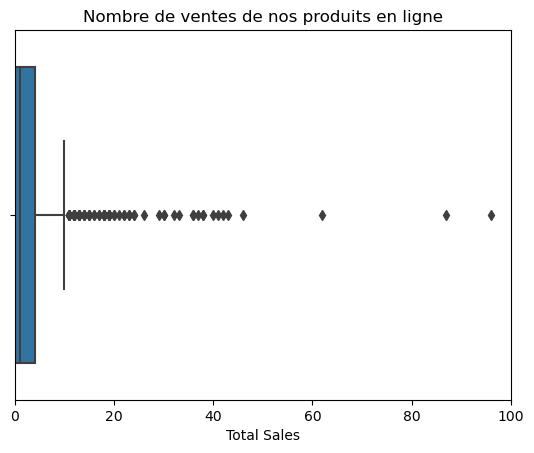

valeurs abérrantes dans la partie supérieure


In [468]:
sns.boxplot(x=erp_web["total_sales"])
plt.xlim(0, 100) 
plt.title("Nombre de ventes de nos produits en ligne")
plt.xlabel("Total Sales")
plt.show()

print("valeurs abérrantes dans la partie supérieure")

Nous avons plusieurs produits dont 3 pour lesquels le nombre de ventes est considéré comme abbérant par rapport à 95% de nos ventes sur l'ensemble de notre catalogue en ligne. 

In [469]:
#Mise en place d'un filtrage pour voir 5% des produits qui ont un prix considéré très supérieure aux autres prix et donc Outliers 
upper_lim2=erp_web["total_sales"].quantile(.95)
erp_web_outlier2=erp_web[erp_web["total_sales"]>upper_lim2]

#sort_values pour voir les prix les plus hauts
erp_web_outliers2_trie=erp_web_outlier2.sort_values(by="total_sales",ascending=False)

#filtre avec un .loc sur la colonne sku et price
erp_web_outliers2_filtre= erp_web_outliers2_trie.loc[:, ["sku", "total_sales"]]
display(erp_web_outliers2_filtre.head(3))

,sku,total_sales
365,7818,96.0
666,1662,87.0
525,16416,62.0


Ci-dessus, les 3 produits qui ont réalisés le plus de vente dans notre boutique en ligne. Le nombre de vente de ces produits est considéré abbérant au vu de la moyenne de l'ensemble des ventes de nos produits et de 95% de notre catalogue.

# Outliers 3 - Catégorie "CA par produit"

In [470]:
# Affichez les indicateurs de tendance centrale
moyenne_price = erp_web["ca_par_produit"].mean()
mediane_price = erp_web["ca_par_produit"].median()
mode_price = erp_web["ca_par_produit"].mode()[0]  
skewness = erp_web["ca_par_produit"].skew()
kurtosis = erp_web["ca_par_produit"].kurtosis()
print("Indicateurs tendance centrale pour la colonne ventes :")
print(f"Moyenne : {moyenne_price}")
print(f"Médiane : {mediane_price}")
print(f"Mode : {mode_price}")
print(f"Skewness : {skewness}")
print(f"Kurtosis : {kurtosis}")

Indicateurs tendance centrale pour la colonne ventes :
Moyenne : 98.83557422969189
Médiane : 15.25
Mode : 0.0
Skewness : 9.59257972901559
Kurtosis : 122.28182539745202


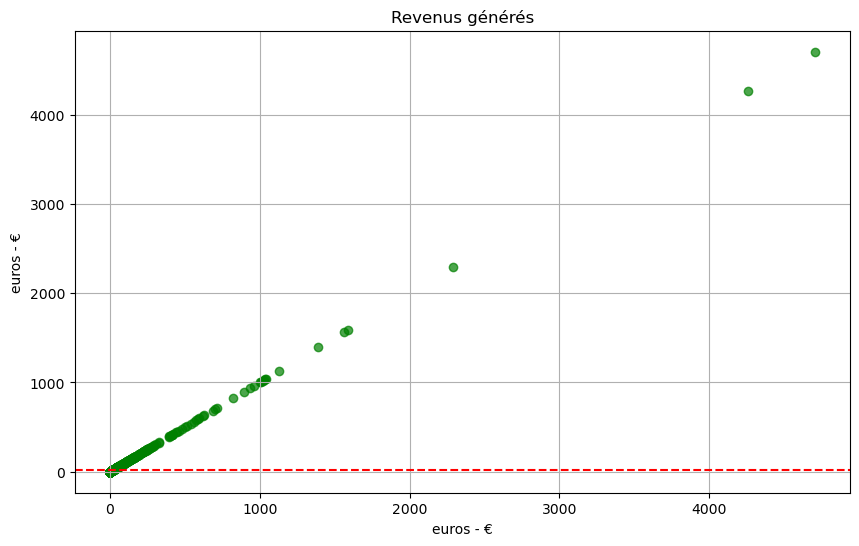

In [471]:
# Création d'un nuage de point
CA_produit_data = erp_web["ca_par_produit"]
mediane_ventes = CA_produit_data.median()


plt.figure(figsize=(10, 6))
plt.scatter(x=CA_produit_data, y=CA_produit_data, color="green", alpha=0.7)
plt.title("Revenus générés")
plt.ylabel("euros - €")
plt.xlabel("euros - €")

plt.axhline(y=mediane_ventes, color="red", linestyle="--", label="Médiane des Ventes")
plt.grid(True)
plt.show()

In [472]:
#Calcul du z_score pour la catégorie "CA par produit" en prenant chaque valeur de cette colonne moins la moyenne (pour avoir la distance 
#entre cette valeur et la moyenne) divisé par l'écart type.


#Création d'une fonction pour calculer le Zscore:
def detect_outliers3(erp_web):
    erp_web_outliers3 = []
    threshold = 5 
    moyenne = np.mean(erp_web)
    ecart_type = np.std(erp_web)
    
    for v in erp_web:
        z_score = (v - moyenne) / ecart_type
        if np.abs(z_score) > threshold:
            erp_web_outliers3.append(v)
    
    return erp_web_outliers3  

# Application de la fonction sur la colonne "ventes"
resultat_outliers3=detect_outliers3(erp_web["ca_par_produit"].sort_values(ascending=False))
display(resultat_outliers3)

[4704.0, 4263.0, 2288.0]

Sku7818=4704.0, 

Sku1662=4263.0, 

Sku3510=2288.0

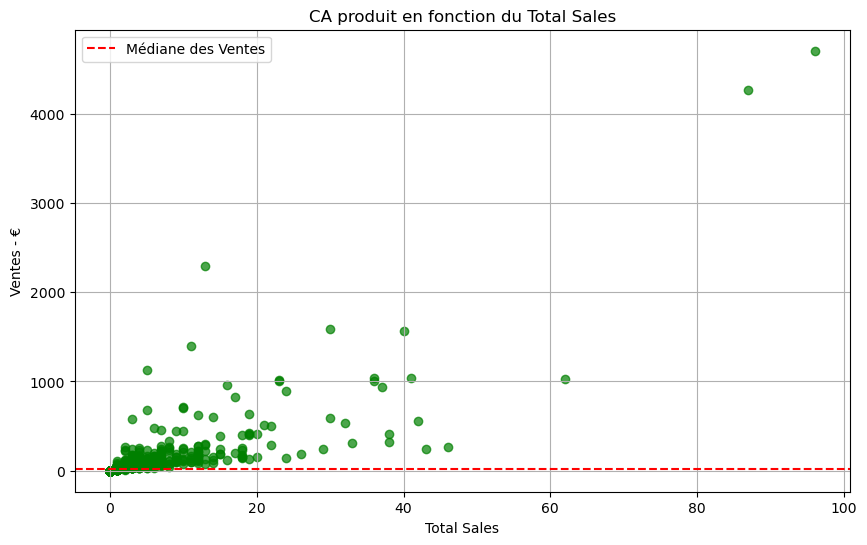

In [473]:
CA_produit_data = erp_web["ca_par_produit"]
total_sales_data = erp_web["total_sales"]
mediane_ventes = CA_produit_data.median()

plt.figure(figsize=(10, 6))
plt.scatter(x=total_sales_data, y=CA_produit_data, color="green", alpha=0.7)
plt.title("CA produit en fonction du Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Ventes - €")

plt.axhline(y=mediane_ventes, color="red", linestyle="--", label="Médiane des Ventes")
plt.legend()
plt.grid(True)
plt.show()

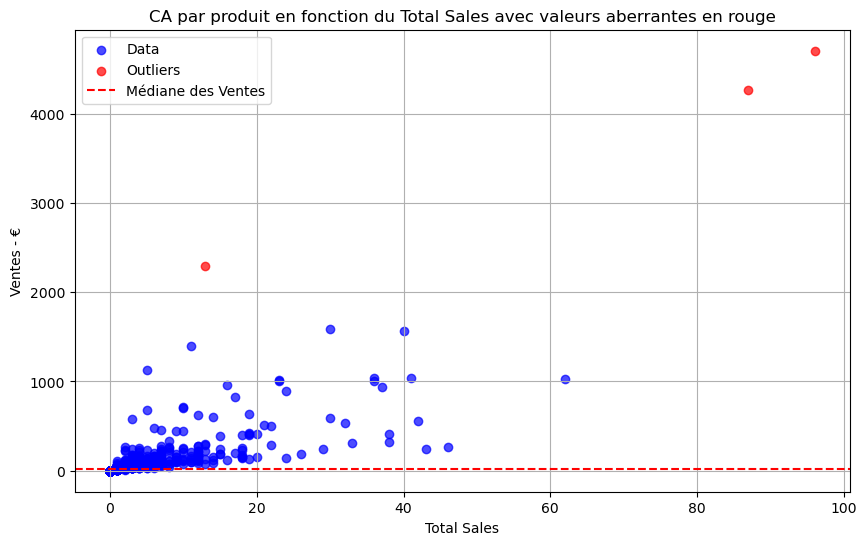

In [474]:
outliers3 = detect_outliers3(CA_produit_data)

plt.figure(figsize=(10, 6))


plt.scatter(x=total_sales_data[~CA_produit_data.isin(outliers3)], y=CA_produit_data[~CA_produit_data.isin(outliers3)], color="blue", alpha=0.7, label="Data")
plt.scatter(x=total_sales_data[CA_produit_data.isin(outliers3)], y=CA_produit_data[CA_produit_data.isin(outliers3)], color="red", alpha=0.7, label="Outliers")

plt.title("CA par produit en fonction du Total Sales avec valeurs aberrantes en rouge")
plt.xlabel("Total Sales")
plt.ylabel("Ventes - €")

# Ajouter une ligne pour représenter la médiane
plt.axhline(y=mediane_ventes, color="red", linestyle="--", label="Médiane des Ventes")

plt.legend()
plt.grid(True)
plt.show()

Avec un seuil (threshold) de 5 on ne montre que les 3 valeurs les plus hautes, ce qui suggère que ces valeurs sont considérées comme vraiment exceptionnelles par rapport à la moyenne. Ici je prends en considération uniquement les valeurs qui sont vraiment très éloignées de la moyenne en terme de ventes/revenus générés.

# Outliers 4 - Catégorie "Stock quantity"

In [475]:
# Affichez les indicateurs de tendance centrale
moyenne_price = erp_web["stock_quantity"].mean()
mediane_price = erp_web["stock_quantity"].median()
mode_price = erp_web["stock_quantity"].mode()[0]  
skewness = erp_web["stock_quantity"].skew()
kurtosis = erp_web["stock_quantity"].kurtosis()
print("Indicateurs tendance centrale pour la colonne stock_quantity :")
print(f"Moyenne : {moyenne_price}")
print(f"Médiane : {mediane_price}")
print(f"Mode : {mode_price}")
print(f"Skewness : {skewness}")
print(f"Kurtosis : {kurtosis}")

Indicateurs tendance centrale pour la colonne stock_quantity :
Moyenne : 28.76330532212885
Médiane : 12.0
Mode : 0
Skewness : 4.490260667677227
Kurtosis : 32.58469573424063


In [476]:
stock_trie=erp_web["stock_quantity"].sort_values(ascending=False)
print(stock_trie)

383    578
8      363
195    289
567    284
149    276
      ... 
164      0
163      0
505      0
517      0
504      0
Name: stock_quantity, Length: 714, dtype: int64


In [477]:
def detect_outliers4(erp_web):
    erp_web_outliers4 = []
    
    stock_trie = erp_web["stock_quantity"].sort_values(ascending=False)
    
    Q1 = np.percentile(stock_trie, 25)
    Q3 = np.percentile(stock_trie, 75)
    Iqr = Q3 - Q1
    
    lwr_bound = Q1 - (1.5 * Iqr)
    upr_bound = Q3 + (1.5 * Iqr)
    
    for i in erp_web["stock_quantity"]:
        if i < lwr_bound or i > upr_bound:
            erp_web_outliers4.append(i)
    
    return sorted(erp_web_outliers4)

outliers4 = detect_outliers4(erp_web)
print("Valeurs aberrantes détectées avec la méthode IQR : ", outliers4)

Valeurs aberrantes détectées avec la méthode IQR :  [85, 85, 88, 88, 89, 89, 90, 92, 93, 94, 95, 95, 96, 97, 98, 99, 100, 101, 102, 105, 106, 109, 109, 112, 114, 118, 120, 123, 123, 124, 128, 129, 130, 132, 133, 137, 140, 141, 143, 151, 157, 161, 163, 167, 168, 178, 180, 190, 195, 203, 209, 211, 237, 257, 267, 276, 284, 289, 363, 578]


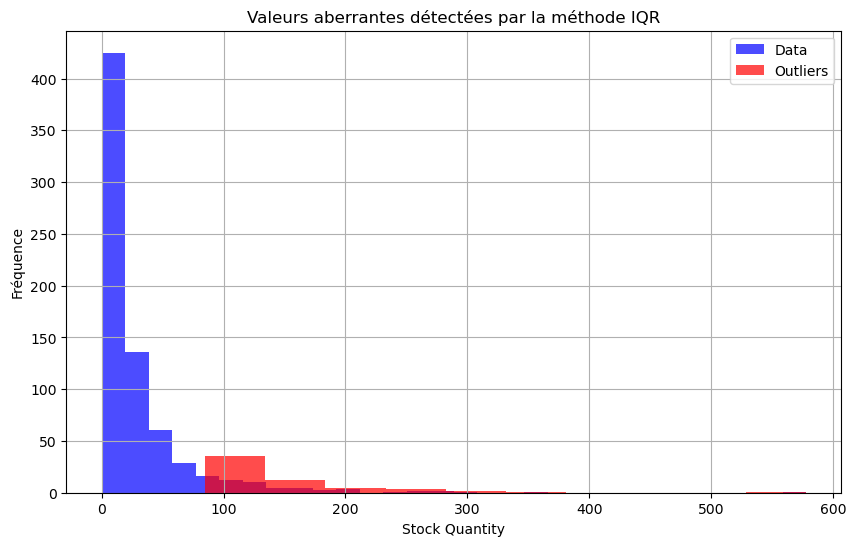

In [478]:
outliers4 = detect_outliers4(erp_web)

plt.figure(figsize=(10, 6))
plt.hist(erp_web["stock_quantity"], bins=30, color="blue", alpha=0.7, label="Data")

plt.hist(outliers4, bins=10, color="red", alpha=0.7, label="Outliers")

plt.title("Valeurs aberrantes détectées par la méthode IQR")
plt.xlabel("Stock Quantity")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

La fréquence représente le nombre d'observations (ou d'événements) qui se situent dans une plage particulière, définie par les bacs (bins). 

La fréquence indique combien de données tombent dans chaque intervalle de valeurs sur l'axe des x.
Nombre de valeur entre 0 et 100 est très important.

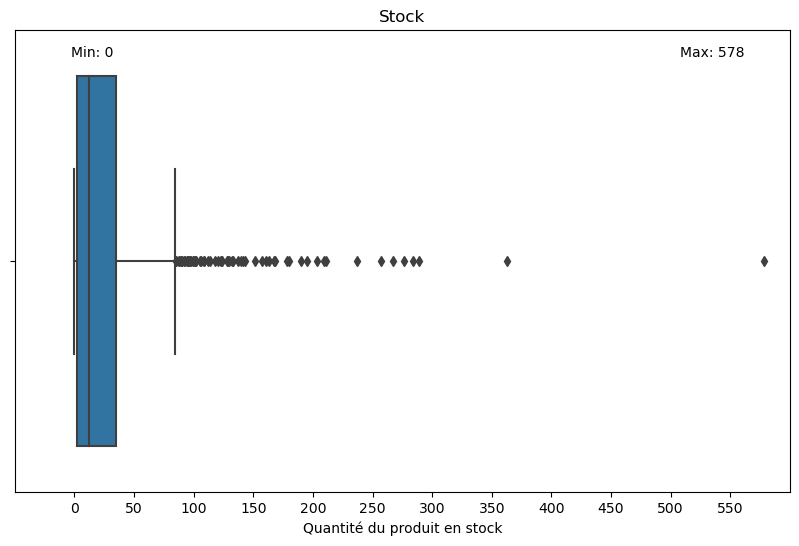

In [479]:
plt.figure(figsize=(10,6))
sns.boxplot(x=erp_web["stock_quantity"])
plt.xlim(-50, 600) 
plt.xticks(range(0, 600, 50))
plt.title("Stock")
plt.xlabel("Quantité du produit en stock")

valeur_minimum = erp_web["stock_quantity"].min()
valeur_maximum = erp_web["stock_quantity"].max()

#J'ai ajouté le min et le max
plt.text(0.1, 0.95, "Min: {}".format(valeur_minimum), transform=plt.gca().transAxes, ha="center", va="center", backgroundcolor="w")
plt.text(0.9, 0.95, "Max: {}".format(valeur_maximum), transform=plt.gca().transAxes, ha="center", va="center", backgroundcolor="w")

plt.show()

In [480]:
erp_web_stock_trie = erp_web.sort_values(by="stock_quantity", ascending=False)
colonnes_ = erp_web_stock_trie.loc[:, ["post_name", "stock_quantity","stock_status", "total_sales", "price"]]

display(colonnes_.head(10))

,post_name,stock_quantity,stock_status,total_sales,price
383,domaine-montrose-cotes-de-thongue-rose-2019,578,instock,16.0,7.6
8,domaine-giudicelli-patrimonio-rouge-2016,363,instock,37.0,25.2
195,chateau-turcaud-bordeaux-rouge-2016,289,instock,2.0,7.0
567,philippe-nusswitz-duche-uzes-orenia-rouge-2017,284,instock,29.0,8.5
149,hortus-pic-saint-loup-la-bergerie-2018,276,instock,9.0,13.5
113,mourgues-du-gres-costieres-de-nimes-galets-rou...,267,instock,11.0,8.7
106,chateau-turcaud-rose-2019,257,instock,1.0,6.5
233,francois-bergeret-hautes-cotes-de-beaune-rouge...,237,instock,0.0,11.8
469,maurel-pays-d-oc-syrah-2019,211,instock,8.0,5.8
85,chateau-de-la-liquiere-faugeres-les-amandiers-...,209,instock,12.0,9.3


Zoom sur les 10 vins/spiritueux ayant le plus de stock (apparaissant donc en valeurs aberrantes).
Ci-dessus la liste des produits ayant le plus de stock (pertinence : Les produits ne se vendent pas ? Une commande trop importante a pu etre faite ?)

In [481]:
erp_web_stock_trie = erp_web.sort_values(by="stock_quantity", ascending=True)
colonnes_ = erp_web_stock_trie.loc[:, ["sku","post_name", "stock_quantity","stock_status", "total_sales", "price"]]

display(colonnes_.head(5))

,sku,post_name,stock_quantity,stock_status,total_sales,price
199,13209,zind-humbrecht-muscat-gc-goldert-2015,0,outofstock,0.0,29.8
520,16190,le-pas-de-lescalette-larzac-clapas-rouge-2018,0,outofstock,1.0,16.6
248,15533,alain-graillot-crozes-hermitage-rouge-la-guira...,0,outofstock,24.0,37.2
539,16149,triennes-igp-mediterranee-rose-2019,0,outofstock,33.0,9.3
101,30002,bon-cadeau-de-25-euros,0,instock,10.0,25.0


Zoom sur les vins et spiritueux qui ont le moins de stock. 

Note > Anomalie avec le bon cadeau, regardons cela de plus près!

# Outliers 5 - Catégorie "Post name/sku"

In [482]:
erp_web.loc[:,["post_name","stock_quantity","total_sales","price"]]

,post_name,stock_quantity,total_sales,price
0,pares-balta-penedes-indigena-2017,57,3.0,12.0
1,maurel-cabardes-tradition-2017,94,6.0,5.7
2,chateau-saransot-dupre-bordeaux-blanc-2016,12,0.0,12.5
3,chateau-de-puligny-montrachet-1cru-champ-canet...,7,0.0,109.6
4,stephane-tissot-chateau-chalon-2011,15,0.0,74.8
...,...,...,...,...
709,jerome-cotes-du-rhone-2018,50,4.0,12.7
710,alphonse-mellot-sancerre-rouge-generation-xix-...,1,0.0,67.5
711,mourgues-du-gres-costieres-de-nimes-terre-darg...,60,3.0,11.9
712,chermette-domaine-du-vissoux-brouilly-pierreux...,35,3.0,15.8


In [483]:
erp_web[~erp_web["sku"].astype(str).str.isdigit()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,ca_par_produit


In [484]:
l101=erp_web.loc[101, ["sku","post_name", "stock_quantity", "stock_status", "total_sales", "price"]]
l247=erp_web.loc[247, ["sku","post_name", "stock_quantity", "stock_status", "total_sales", "price"]]
print(l101)
print(l247)


sku                                30002
post_name         bon-cadeau-de-25-euros
stock_quantity                         0
stock_status                     instock
total_sales                         10.0
price                               25.0
Name: 101, dtype: object
sku                                                        30000
post_name         clos-du-mont-olivet-chateauneuf-du-pape-2007-2
stock_quantity                                                23
stock_status                                             instock
total_sales                                                  0.0
price                                                       54.8
Name: 247, dtype: object


In [485]:
sku_13127=erp_web[erp_web["sku"]==13127]
display(sku_13127)
l427=erp_web.loc[427, ["sku","post_name", "stock_quantity", "stock_status", "total_sales", "price"]]
print(l427)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,ca_par_produit
427,13127,0,0,0,0.0,23.0,taxable,NaN,2.0,2018-02-12 11:18:33,...,0.0,product,NaN,0.0,4053,1,44.3,16,instock,1018.9


sku                                                      13127
post_name         clos-du-mont-olivet-chateauneuf-du-pape-2012
stock_quantity                                              16
stock_status                                           instock
total_sales                                               23.0
price                                                     44.3
Name: 427, dtype: object


Les vins identifiés 13127 et 13127-1 sont effectivement les mêmes, seule l'année (le cru) est différente. 
Dans un souci d'harmonisation des références, il serait toutefois plus judicieux de donner un autre ID sans "-" pour le vin "clos-du-mont-olivet-chateauneuf-du-pape-2007"

## Zoom sur mes vins les + chers

In [486]:
trie_vins_chers=erp_web["price"].sort_values(ascending=False)
print(trie_vins_chers.head(5))

670    225.0
315    217.5
559    191.3
186    176.0
177    175.0
Name: price, dtype: float64


In [487]:
l670=erp_web.loc[670, ["sku","product_id","post_name", "stock_quantity", "stock_status", "total_sales", "price","ca_par_produit"]]
l315=erp_web.loc[315, ["sku","product_id","post_name", "stock_quantity", "stock_status", "total_sales", "price","ca_par_produit"]]
l559=erp_web.loc[559, ["sku","product_id", "stock_quantity", "stock_status", "total_sales", "price","ca_par_produit"]]

display(l670)
display(l315)
display(l559)

sku                                                        15940
product_id                                                  4352
post_name         champagne-egly-ouriet-grand-cru-millesime-2008
stock_quantity                                                 0
stock_status                                          outofstock
total_sales                                                  5.0
price                                                      225.0
ca_par_produit                                            1125.0
Name: 670, dtype: object

sku                                                        14581
product_id                                                  5001
post_name         david-duband-charmes-chambertin-grand-cru-2014
stock_quantity                                                20
stock_status                                             instock
total_sales                                                  0.0
price                                                      217.5
ca_par_produit                                               0.0
Name: 315, dtype: object

sku                 14983
product_id           5892
stock_quantity         10
stock_status      instock
total_sales           3.0
price               191.3
ca_par_produit      573.9
Name: 559, dtype: object